In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [202]:
#target->price

## Linear Regression

In [203]:
df = pd.read_csv('ecommerce_dataset_updated.csv')

In [204]:
df

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024
...,...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI,14-05-2024
3656,34ebc1a0,08838c2c-9,Toys,212.87,15,180.94,Cash on Delivery,19-11-2024
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking,07-08-2024
3658,0611293d,b4f67f96-9,Electronics,447.66,30,313.36,UPI,21-05-2024


In [205]:
copy_df = df.copy()
copy_df.isnull().sum()

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

In [206]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [208]:
drop_col = ['User_ID', 'Product_ID']
copy_df = copy_df.drop(drop_col, axis=1)

In [209]:
copy_df['Purchase_Date'].unique()

array(['12-11-2024', '09-02-2024', '01-09-2024', '01-04-2024',
       '27-09-2024', '08-08-2024', '28-03-2024', '29-05-2024',
       '26-02-2024', '11-01-2024', '21-10-2024', '10-09-2024',
       '08-03-2024', '10-05-2024', '20-06-2024', '28-04-2024',
       '17-08-2024', '13-06-2024', '23-09-2024', '01-06-2024',
       '19-04-2024', '07-11-2024', '31-08-2024', '14-09-2024',
       '03-02-2024', '14-04-2024', '06-08-2024', '05-08-2024',
       '28-06-2024', '22-04-2024', '07-10-2024', '20-03-2024',
       '10-03-2024', '21-05-2024', '15-01-2024', '21-04-2024',
       '03-08-2024', '01-07-2024', '20-02-2024', '25-08-2024',
       '17-05-2024', '18-06-2024', '15-09-2024', '12-05-2024',
       '25-02-2024', '30-10-2024', '11-08-2024', '03-06-2024',
       '08-10-2024', '04-04-2024', '08-05-2024', '30-06-2024',
       '04-10-2024', '22-10-2024', '29-08-2024', '10-08-2024',
       '22-08-2024', '24-07-2024', '16-09-2024', '18-07-2024',
       '07-07-2024', '09-03-2024', '29-01-2024', '27-02

In [210]:
copy_df['Purchase_Date'] = pd.to_datetime(copy_df['Purchase_Date'], format='%d-%m-%Y')

In [211]:
copy_df['Year'] = copy_df['Purchase_Date'].dt.year
copy_df['Month'] = copy_df['Purchase_Date'].dt.month
copy_df['Day'] = copy_df['Purchase_Date'].dt.day
copy_df['Weekday'] = copy_df['Purchase_Date'].dt.weekday
copy_df = copy_df.drop(['Purchase_Date'], axis=1)

In [212]:
copy_df['Price (Rs.)'].unique()

array([ 36.53, 232.79, 317.02, ..., 212.87, 389.76, 235.77])

In [213]:
copy_df['Category'].unique()
copy_df['Payment_Method'].unique()

array(['Net Banking', 'Credit Card', 'UPI', 'Cash on Delivery',
       'Debit Card'], dtype=object)

In [245]:
enc_columns = ['Category', 'Payment_Method']
data = pd.get_dummies(copy_df,columns=enc_columns)
data

,Price (Rs.),Discount (%),Final_Price(Rs.),Year,Month,Day,Weekday,Category_Beauty,Category_Books,Category_Clothing,Category_Electronics,Category_Home & Kitchen,Category_Sports,Category_Toys,Payment_Method_Cash on Delivery,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI
0,36.53,15,31.05,2024,11,12,1,False,False,False,False,False,True,False,False,False,False,True,False
1,232.79,20,186.23,2024,2,9,4,False,False,True,False,False,False,False,False,False,False,True,False
2,317.02,25,237.76,2024,9,1,6,False,False,False,False,False,True,False,False,True,False,False,False
3,173.19,25,129.89,2024,4,1,0,False,False,False,False,False,False,True,False,False,False,False,True
4,244.80,20,195.84,2024,9,27,4,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,486.79,0,486.79,2024,5,14,1,True,False,False,False,False,False,False,False,False,False,False,True
3656,212.87,15,180.94,2024,11,19,1,False,False,False,False,False,False,True,True,False,False,False,False
3657,389.76,0,389.76,2024,8,7,2,False,False,False,False,True,False,False,False,False,False,True,False
3658,447.66,30,313.36,2024,5,21,1,False,False,False,True,False,False,False,False,False,False,False,True


<Axes: >

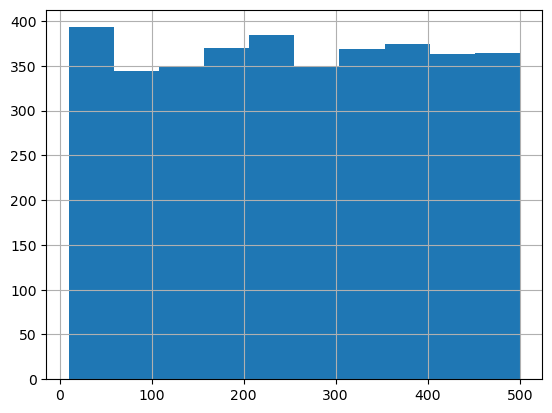

In [247]:
data['Price (Rs.)'].hist()

In [251]:
X = data.drop(['Price (Rs.)'],axis=1)
Y = data['Price (Rs.)']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [313]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [315]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [317]:
model.fit(X_train,y_train)

LinearRegression()

In [319]:
model.coef_

array([ 4.47145567e+01,  1.46868240e+02, -1.72549349e+14,  4.62493440e-01,
       -1.56372038e-01,  4.29554549e-01, -1.71813040e+14, -1.82491657e+14,
       -1.75513390e+14, -1.73125066e+14, -1.83492887e+14, -1.78369853e+14,
       -1.78545433e+14,  3.87244606e+14,  4.03571870e+14,  3.99092314e+14,
        4.00100186e+14,  3.99344954e+14])

In [321]:
model.intercept_

255.01305923198737

In [323]:
y_pred = model.predict(X_test)

In [331]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
r2_score(y_test,y_pred)

In [335]:
print(mean_absolute_error(y_test,y_pred))

16.898491967912772


In [ ]:
#target->Category

## Logistic Regression

In [405]:
# enc_columns = ['Payment_Method']
# data = pd.get_dummies(copy_df,columns=enc_columns)
# encoder = LabelEncoder()
# data['Category'] = encoder.fit_transform(data['Category'])
# data.sample(3)

In [401]:
# X = data.drop(['Category'],axis=1)
# Y = data['Category']
# X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [403]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# model.fit(X_train,y_train)